# Logistic Regression
## SHAP Example - Adult Census Income
Source https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html


**Problem: Predict whether a given person's income falls above or below a certain threshold (>=50K or <=50K).**

In [1]:
import pandas as pd
import shap
import sklearn

# a classic adult census dataset price dataset
X_adult,y_adult = shap.datasets.adult()

# a simple linear logistic model
model_adult = sklearn.linear_model.LogisticRegression(max_iter=10000)
model_adult.fit(X_adult, y_adult)

def model_adult_proba(x):
    return model_adult.predict_proba(x)[:,1]
def model_adult_log_odds(x):
    p = model_adult.predict_log_proba(x)
    return p[:,1] - p[:,0]

In [22]:
X_adult.head()
# y_adult

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5


Note that explaining the probability of a linear logistic regression model is not linear in the inputs.

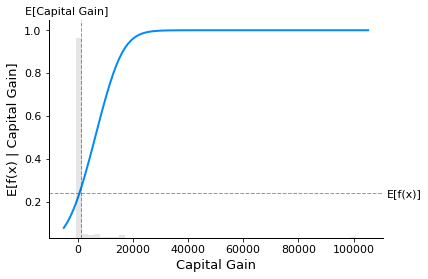

In [2]:
# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    "Capital Gain", model_adult_proba, X_adult, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

If we use SHAP to explain the probability of a linear logistic regression model we see strong interaction effects. This is because a linear logistic regression model NOT additive in the probability space.

In [7]:
# compute the SHAP values for the linear model
background_adult = shap.maskers.Independent(X_adult, max_samples=100)
explainer = shap.Explainer(model_adult, background_adult)
shap_values_adult = explainer(X_adult[:1000])

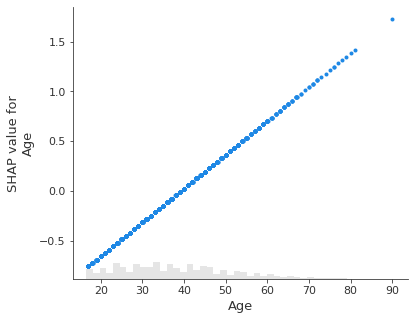

In [8]:
shap.plots.scatter(shap_values_adult[:,"Age"])

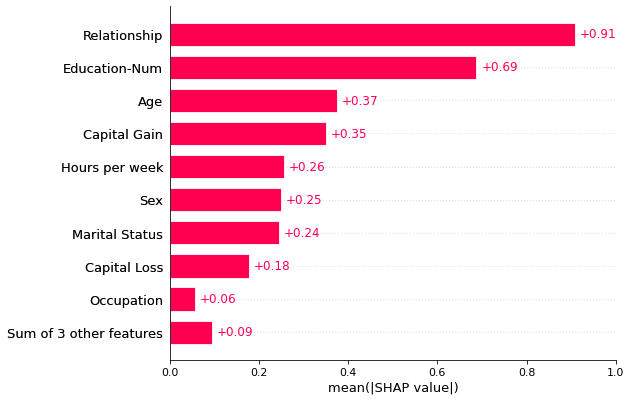

In [10]:
shap.plots.bar(shap_values_adult)

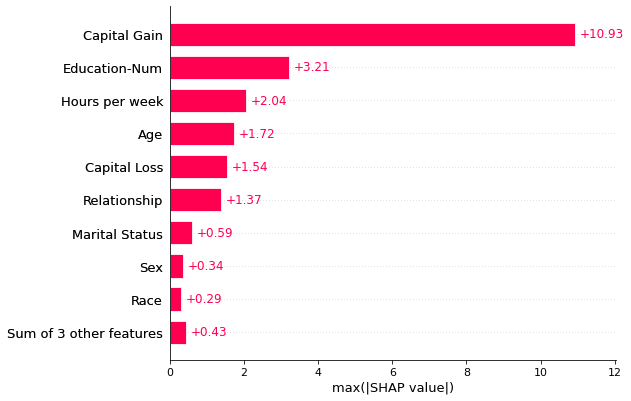

In [11]:
# using the max absolute value highights the Capital Gain and Capital Loss features, since they have infrequent but high magnitude effects
shap.plots.bar(shap_values_adult.abs.max(0))

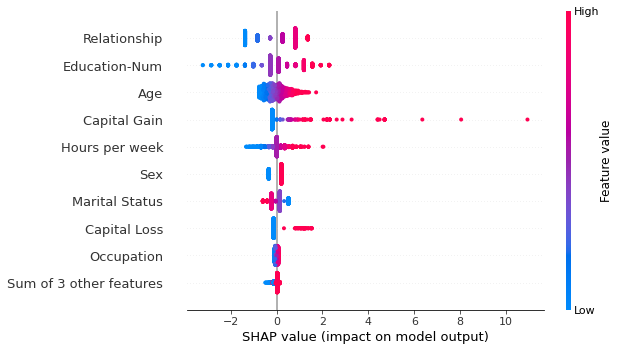

In [12]:
shap.plots.beeswarm(shap_values_adult)

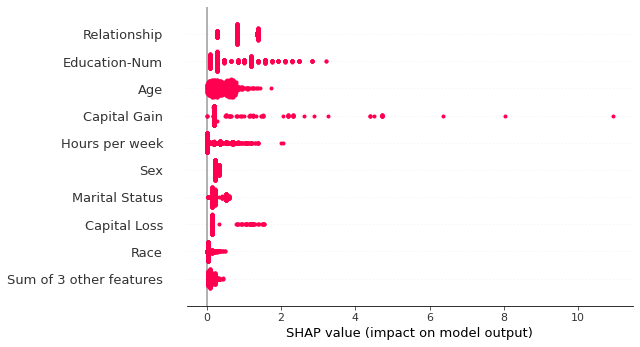

In [13]:
shap.plots.beeswarm(shap_values_adult.abs, color="shap_red")

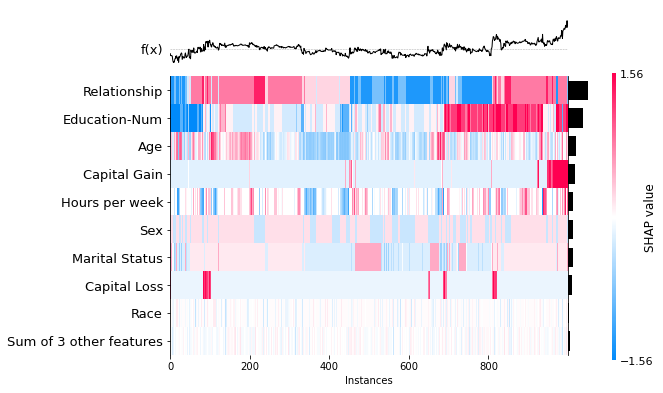

In [14]:
shap.plots.heatmap(shap_values_adult[:1000])